# 4 Analysis regions

## 4.1 Analysis regions

As visible from this image, the events and data related to the analysis have been divided in different regions. Each region corresponds to one folder:
* `sr_highZ` is one of the two signal regions, where the Zeppenfeld variable (`Z_ll`) is higher than 1; 
* `sr_lowZ` is the other signal region, where the `Z_ll` < 1;
* `topcr` is the crontrol region of the top process, the main background of the analysis;
* `dycr` is the control region of the DY process;

To divide events and data in different kinematic regions, different cuts and selections have been applied. For example the event in the signal regions must not have any b-jet (i.e. jets derive from b-quarks). 

On the contrary, events in top control region (`topcr`) have to have b-jets. Indeed the quark top, after its production will decay in b-quark.

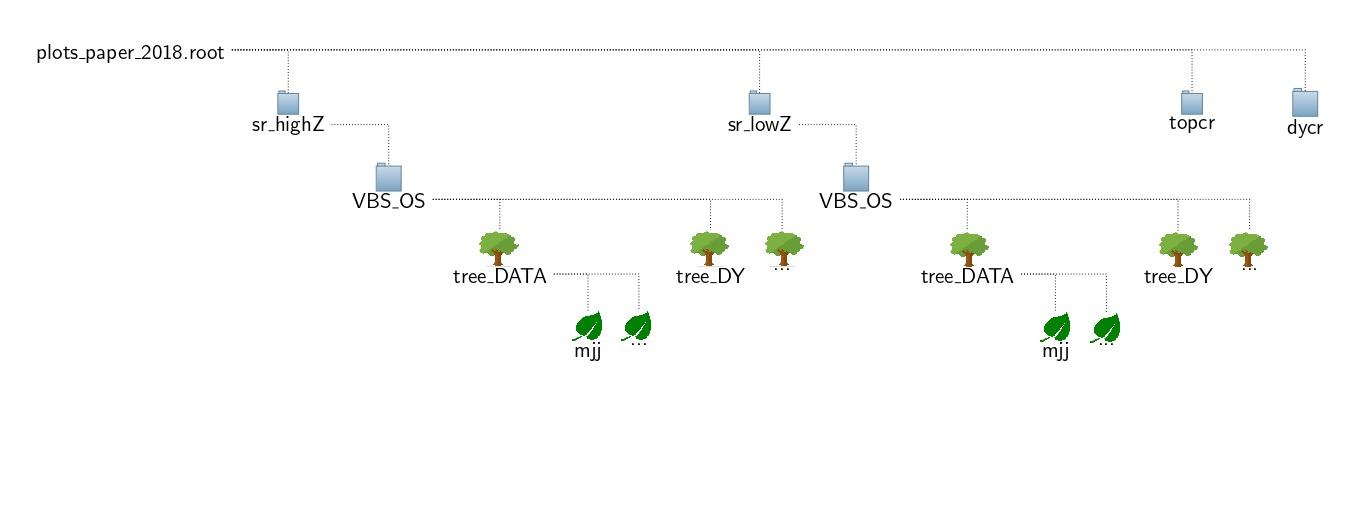

In [93]:
from IPython.display import Image
Image(filename='/home/llr/cms/mchiusi/TREX-PHY584/structureroot.jpg') 

### 4.1.1 Control regions

As already explained above, by signal region, we mean the region in the phase space defined by our signal selection, i.e. the trigger and all offline selections that we use in the analysis.

In addition to signal region, two different control regions are present in this analysis. These are obtained by changing some of the cuts with respect to our signal selection, to define regions that are in some aspects similar to signal region, but they are signal-depleted, i.e. the signal-to-background ratio is very tiny. 

Typically we want to define control regions that are enriched in a particular background process, and have sufficient statistics. In these regions we can calculate for example the normalization parameters for both generated events and data collected, compare them and make small correction data-driven. Indeed, in a particular CR there are enough events that enter to give us sufficient statistical precision.

### 4.2 To do

### 4.2.1 Plot variables with weights

Write a code that creates some plots for variables of your choice. I leave to you the decision of what can be interesting. Next time we will discuss the definition of a signal region, i.e. a subset of the full space where S/B is 'maximal', therefore try to think of interesting variables that can allow us to identify such a region.

Remember to apply the correct weights to the correct events.

You can use the following file (structured as explained below):
* `tree_complete.root`

### 4.2.2 Table of values

Starting from the code you created, compute the number of events expected for signal `tree_WWewk` and background (like `tree_top` and `tree_dy`). Compare them in a signal region (`sr_highZ` or `sr_lowZ`) and do the same in a control region (`topcr` or `dycr`).

Hint: To calculate the number of events in a region, you can first plot the histogram of a variable in a region, and then compute the Integral of the histogram.

The same result can be also obtained reading the number of rows of each `pandas DataFrame` containing events.

**WORK TOGETHER, I WOULD LIKE BOTH OF YOU TO ARRIVE WITH THE SAME LEVEL OF KNOWLEDGE OF WHAT YOU HAVE DONE!**

**AS ALWAYS, I AM AVAILABLE FOR ANY PROBLEM OR DOUBT. CONTACT ME ON SKYOE. BUT I ASK YOU TRY AND FIGURE OUT DOUBTS TOGETEHR BEFORE ASKING ME**

### Solution 4.2.1

In [12]:
import uproot

filename  = "tree_complete.root"
name_tree = "sr_lowZ/VBS_OS/tree_WWewk"
branches  = ['Zepp_ll', 'pt_1l','eta_1l','pt_2l','eta_2l','dphill', 'mll','ptll','detajj','mjj','weight', 'eta_1j']

tree_signal = uproot.open(filename)[name_tree] # tree definition
signal_df   = tree_signal.arrays(branches, library='pd') # dataframe (df) definition

signal_df.head()

,Zepp_ll,pt_1l,eta_1l,pt_2l,eta_2l,dphill,mll,ptll,detajj,mjj,weight,eta_1j
0,0.266937,185.838654,-0.400696,168.203842,1.623535,0.056396,422.313721,353.902100,3.230957,1951.390503,0.007932,-1.270996
1,0.882690,157.042480,0.410156,72.731941,1.690186,2.537702,251.120163,105.587074,4.426758,950.362549,0.004509,-2.045898
2,0.647644,58.127350,-0.983887,46.483418,-0.357056,0.306152,36.717110,103.402763,1.565186,1045.534912,0.005405,0.759766
3,0.650513,81.645531,0.775879,32.867077,1.847168,1.157471,81.221756,99.508247,1.103271,356.711700,0.004944,2.513672
4,0.862061,112.774139,-1.734619,15.403374,0.500488,3.016095,140.961899,97.510963,0.922607,131.319275,0.003393,-1.017822


In [13]:
name_tree = "sr_lowZ/VBS_OS/tree_top"

tree_top  = uproot.open(filename)[name_tree] # tree definition
top_df    = tree_top.arrays(branches, library='pd') # dataframe (df) definition

In [14]:
name_tree = "sr_lowZ/VBS_OS/tree_DY"

tree_dy  = uproot.open(filename)[name_tree] # tree definition
dy_df    = tree_dy.arrays(branches, library='pd') # dataframe (df) definition

In [15]:
name_tree = "sr_lowZ/VBS_OS/tree_WW"

tree_ww  = uproot.open(filename)[name_tree] # tree definition
ww_df    = tree_ww.arrays(branches, library='pd') # dataframe (df) definition

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Warning in <TROOT::Append>: Replacing existing TH1: signal (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: top (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: dy (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: ww (Potential memory leak).


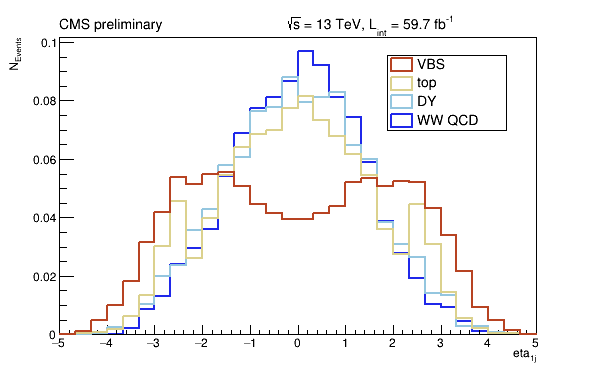

In [21]:
import ROOT
ROOT.gStyle.SetOptTitle(0)
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetHistLineWidth(2)
ROOT.gStyle.SetPalette(87)

# choose variable
var = 'eta_1j'
latex_var = ';eta_{1j}; N_{Events}'

# choose nbin
nbin = 30
max = 5
min = -5

# Create a canvas
c_all = ROOT.TCanvas('c', 'plot variable', 600, 400)

# Create a histogram and draw it
h1 = ROOT.TH1F('signal', latex_var, nbin, min, max)
h2 = ROOT.TH1F('top',    latex_var, nbin, min, max)
h3 = ROOT.TH1F('dy',     latex_var, nbin, min, max)
h4 = ROOT.TH1F('ww',     latex_var, nbin, min, max)

for event in signal_df.index:
        h1.Fill(signal_df[var][event], signal_df.weight[event])
        
for event in top_df.index:
        h2.Fill(top_df[var][event], top_df.weight[event])
        
for event in dy_df.index:
        h3.Fill(dy_df[var][event], dy_df.weight[event])
        
for event in ww_df.index:
        h4.Fill(ww_df[var][event], ww_df.weight[event])

h2.Scale(1/h2.Integral())
h1.Scale(1/h1.Integral())
h3.Scale(1/h3.Integral())
h4.Scale(1/h4.Integral())

h4.Draw("SAME HIST PLC PMC")
h3.Draw("SAME HIST PLC PMC")
h2.Draw("SAME HIST PLC PMC")
h1.Draw("SAME HIST PLC PMC")

# Let's add some CMS style headline
label = ROOT.TLatex()
label.SetNDC(True)
label.SetTextSize(0.040)
label.DrawLatex(0.10, 0.92, '#bf{CMS preliminary}')
label.DrawLatex(0.48, 0.92, '#bf{#sqrt{s} = 13 TeV, L_{int} = 59.7 fb^{-1}}')

legend = ROOT.TLegend(0.65,0.65,0.85,0.85);
legend.AddEntry(h1,"VBS","f")
legend.AddEntry(h2,"top","f")
legend.AddEntry(h3,"DY","f")
legend.AddEntry(h4,"WW QCD","f")
legend.Draw()

# show interactively
c_all.Draw()